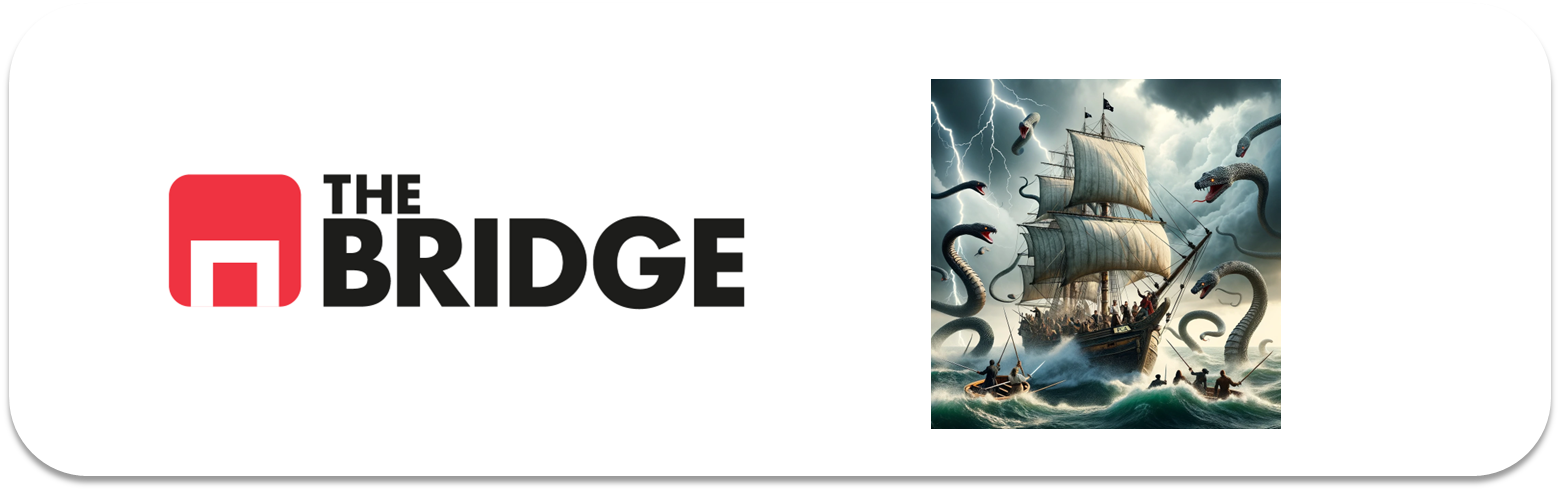

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import SelectKBest, f_classif

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [3]:
df = pd.read_csv('./data/credit_npo.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [4]:
df.dropna(inplace=True)
df_todo=df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

In [5]:
df.nunique()

SeriousDlqin2yrs                            2
RevolvingUtilizationOfUnsecuredLines    10314
age                                        78
NumberOfTime30-59DaysPastDueNotWorse       10
DebtRatio                               11472
MonthlyIncome                            4167
NumberOfOpenCreditLinesAndLoans            43
NumberOfTimes90DaysLate                    13
NumberRealEstateLoansOrLines               16
NumberOfTime60-89DaysPastDueNotWorse        8
NumberOfDependents                         10
dtype: int64

In [6]:
columnas=df.columns.to_list
columnas


<bound method IndexOpsMixin.tolist of Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')>

In [7]:
df.NumberOfDependents.value_counts()

NumberOfDependents
0.0     6413
1.0     2369
2.0     1813
3.0      881
4.0      251
5.0       61
6.0       24
8.0        2
10.0       1
7.0        1
Name: count, dtype: int64

In [8]:
#convertir NumberOfDependents  a categorico (0 = 0, resto = 1)
df.loc[df.NumberOfDependents  >0, 'NumberOfDependents'] = 1
df.NumberOfDependents.value_counts()

NumberOfDependents
0.0    6413
1.0    5403
Name: count, dtype: int64

In [9]:
df["NumberOfTime60-89DaysPastDueNotWorse"].value_counts()

NumberOfTime60-89DaysPastDueNotWorse
0     11206
1       478
2        85
3        18
4        14
98       10
5         4
11        1
Name: count, dtype: int64

In [10]:
df.loc[(df["NumberOfTime60-89DaysPastDueNotWorse"] > 0) & (df["NumberOfTime60-89DaysPastDueNotWorse"] < 90), 'NumberOfTime60-89DaysPastDueNotWorse'] = 1

In [11]:
df["NumberOfTime60-89DaysPastDueNotWorse"].value_counts()

NumberOfTime60-89DaysPastDueNotWorse
0     11206
1       600
98       10
Name: count, dtype: int64

In [12]:
df["NumberRealEstateLoansOrLines"].value_counts()
df.loc[df["NumberRealEstateLoansOrLines"]>1, 'NumberRealEstateLoansOrLines'] = 2
df["NumberRealEstateLoansOrLines"].value_counts()

NumberRealEstateLoansOrLines
0    4233
1    4149
2    3434
Name: count, dtype: int64

In [13]:
df["NumberOfTimes90DaysLate"].value_counts()
df.loc[df["NumberOfTimes90DaysLate"]>0, "NumberOfTimes90DaysLate"] = 1
df["NumberOfTimes90DaysLate"].value_counts()

NumberOfTimes90DaysLate
0    11156
1      660
Name: count, dtype: int64

In [14]:
df["NumberOfTime30-59DaysPastDueNotWorse"].value_counts()
df.loc[(df["NumberOfTime30-59DaysPastDueNotWorse"] > 0) & (df["NumberOfTime30-59DaysPastDueNotWorse"] < 90), 'NumberOfTime30-59DaysPastDueNotWorse'] = 1
df["NumberOfTime30-59DaysPastDueNotWorse"].value_counts()

NumberOfTime30-59DaysPastDueNotWorse
0     9818
1     1988
98      10
Name: count, dtype: int64

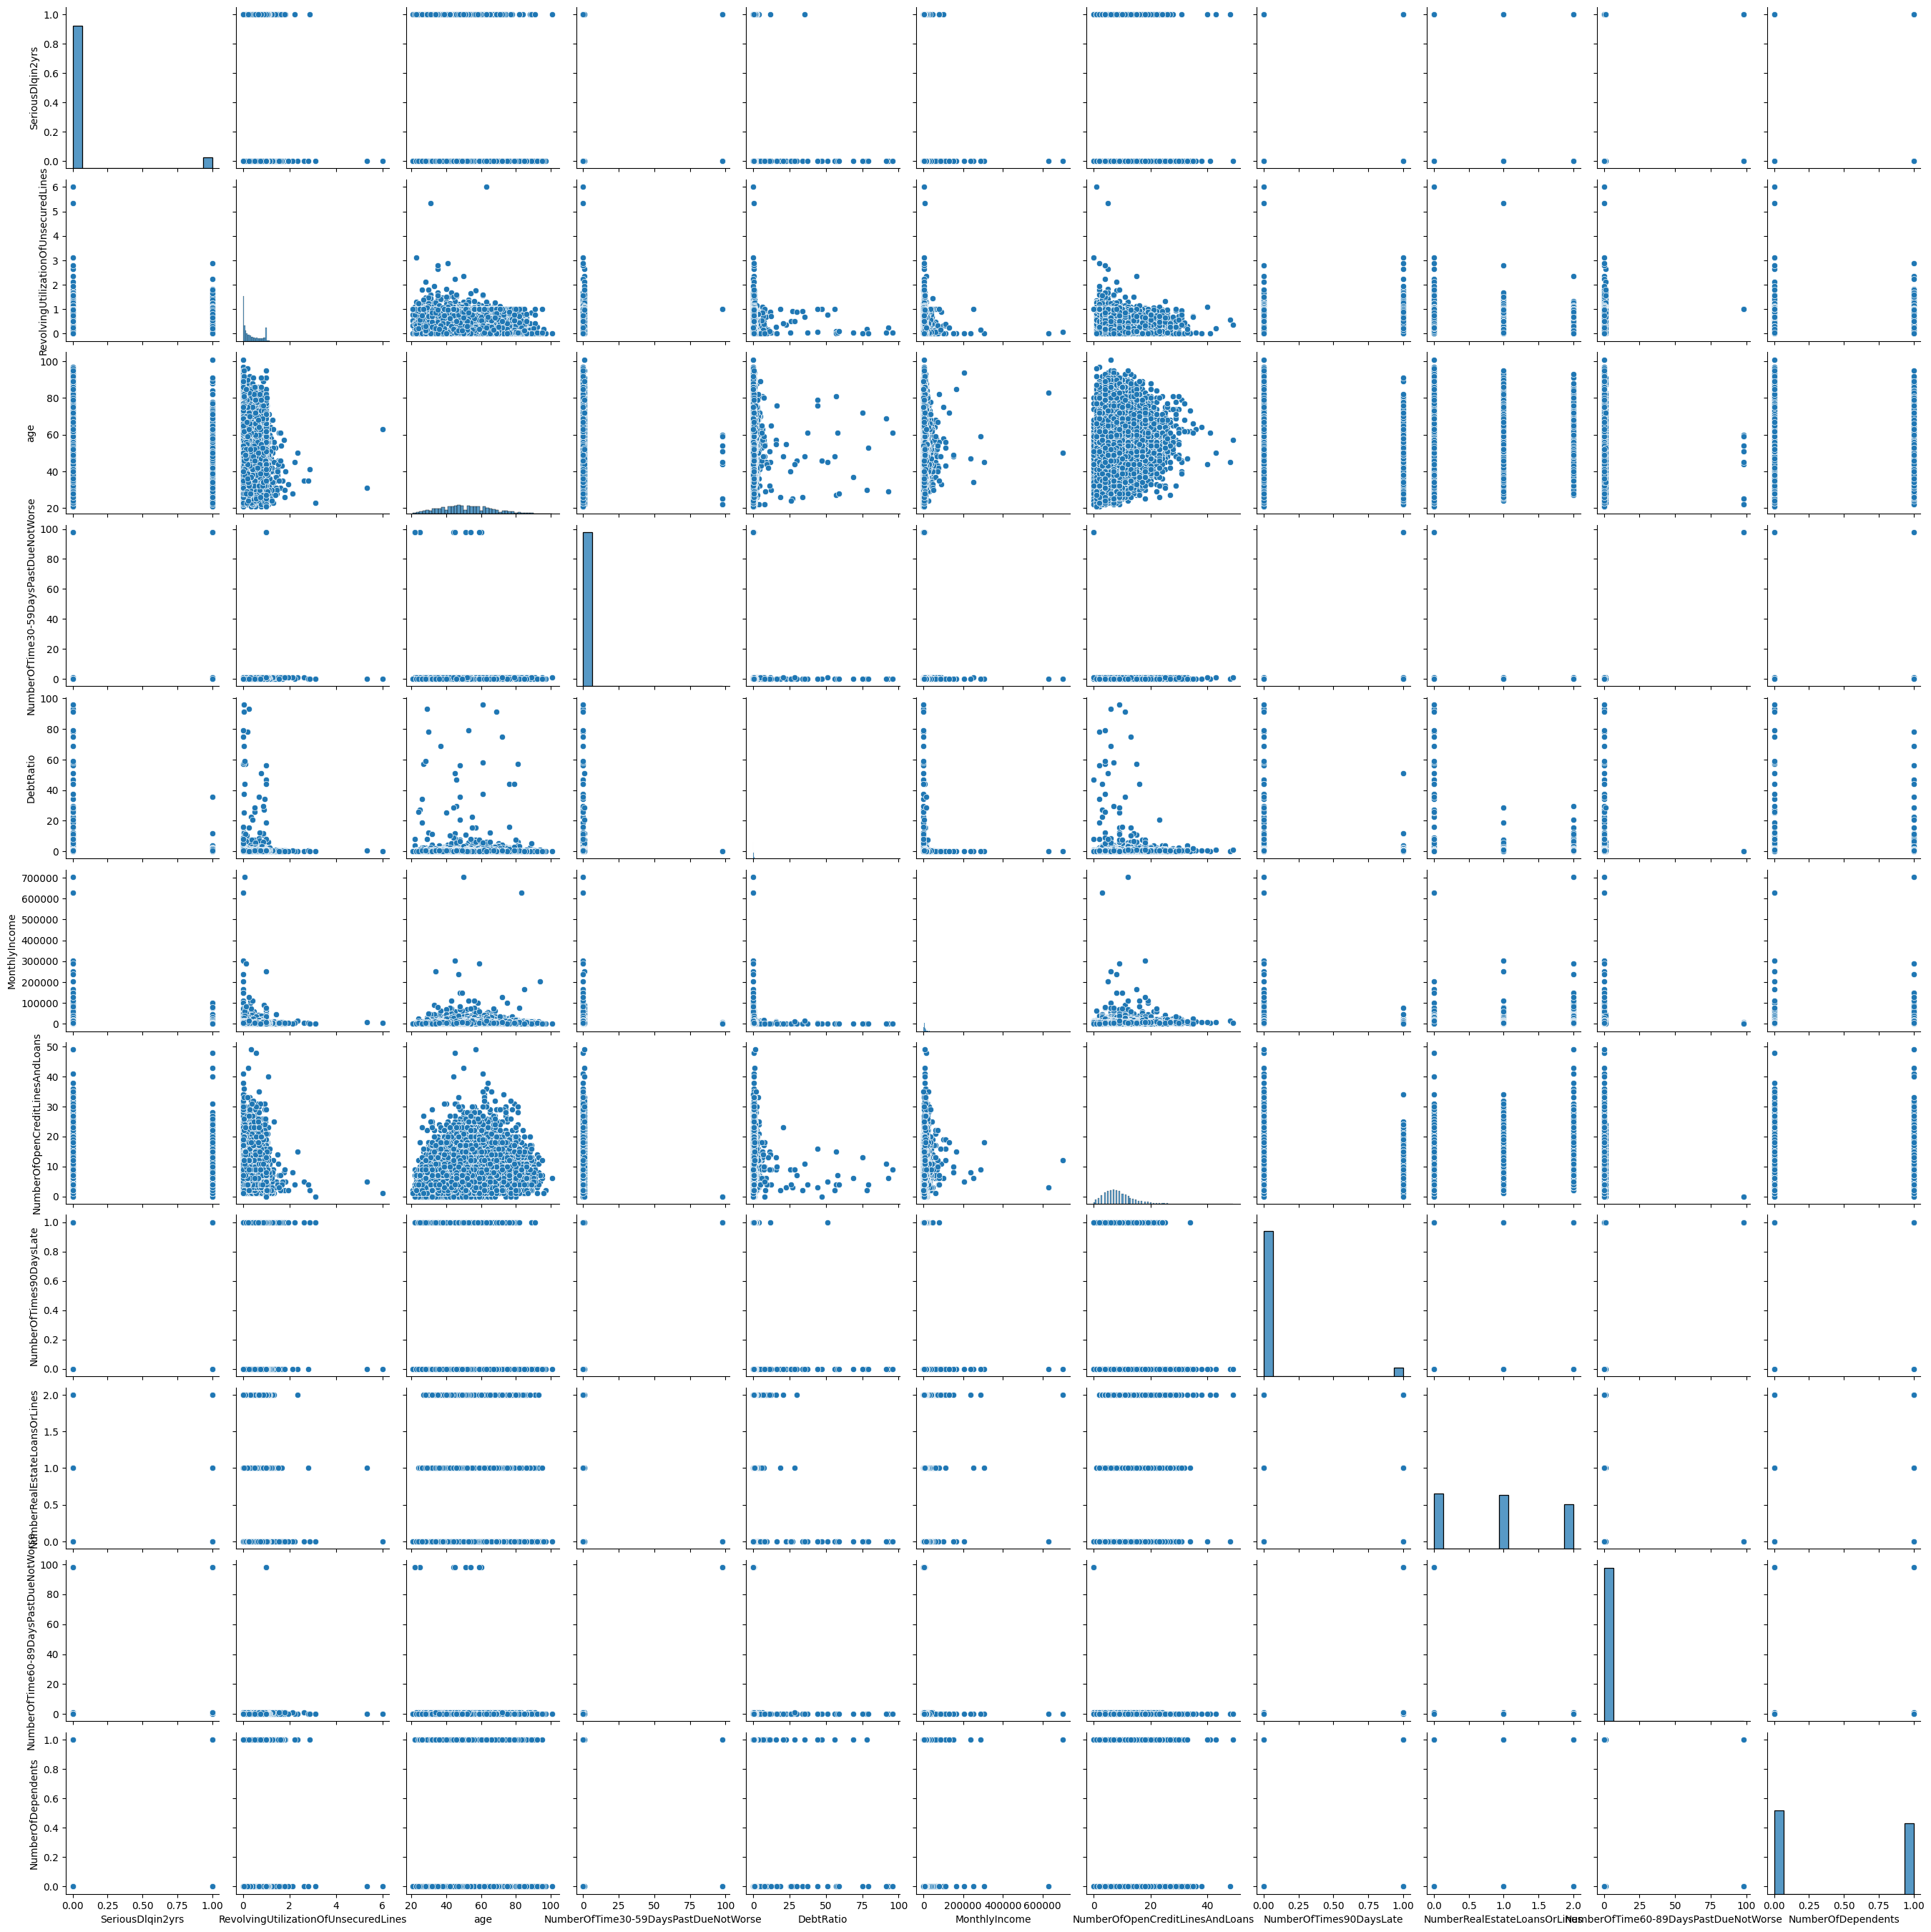

In [15]:
sns.pairplot(df)

In [16]:
X = df_todo.drop('SeriousDlqin2yrs', axis=1)  # Variables independientes
y = df_todo["SeriousDlqin2yrs"] # Variable objetivo


In [17]:
# Seleccionar las 2 mejores características según ANOVA
k = 4
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)  # Aplicar la selección

# Mostrar los nombres de las características seleccionadas
selected_features = X.columns[selector.get_support()]
print(f"Características seleccionadas: {selected_features.tolist()}")


Características seleccionadas: ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate']


Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.

In [22]:
umbral_correlacion=0.1
correlacion = np.abs(df.corr()["SeriousDlqin2yrs"].drop("SeriousDlqin2yrs").sort_values(ascending=False))
variables_correlacion = correlacion[correlacion > umbral_correlacion].index.to_list()
variables_correlacion

['NumberOfTimes90DaysLate',
 'RevolvingUtilizationOfUnsecuredLines',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'age']

In [24]:
matriz_covarianza= df[variables_correlacion + ["SeriousDlqin2yrs"]].cov()
matriz_covarianza
#umbral_covarianza=0.5

,NumberOfTimes90DaysLate,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,age,SeriousDlqin2yrs
NumberOfTimes90DaysLate,0.052741,0.024417,0.097522,-0.336139,0.020283
RevolvingUtilizationOfUnsecuredLines,0.024417,0.133378,0.088929,-1.370189,0.026167
NumberOfTime30-59DaysPastDueNotWorse,0.097522,0.088929,8.233812,-1.300277,0.073594
age,-0.336139,-1.370189,-1.300277,210.722106,-0.393533
SeriousDlqin2yrs,0.020283,0.026167,0.073594,-0.393533,0.065315


### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.